In [15]:
pip install yahoo_fin pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Test Model

In [16]:
from datetime import datetime
from yahoo_fin import stock_info as si
import pandas as pd


In [17]:
stock_symbol = "AAPL"
start_date = datetime(1990, 1, 1)
end_date = datetime(2000, 12, 31)


In [18]:
prices = si.get_data(stock_symbol, start_date, end_date)


In [19]:
prices_df = pd.DataFrame(prices)
prices_df

,open,high,low,close,adjclose,volume,ticker
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.264482,183198400,AAPL
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.266257,207995200,AAPL
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.267145,221513600,AAPL
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.268033,123312000,AAPL
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.269808,101572800,AAPL
...,...,...,...,...,...,...,...
2000-12-22,0.252232,0.267857,0.252232,0.267857,0.227978,318052000,AAPL
2000-12-26,0.265625,0.267857,0.254464,0.262277,0.223229,216815200,AAPL
2000-12-27,0.256138,0.264509,0.253348,0.264509,0.225128,325466400,AAPL
2000-12-28,0.256696,0.266741,0.255580,0.264509,0.225128,305177600,AAPL


Actual Model looking at 5 stocks within the tech industry 


In [20]:
stock_symbols = ["AAPL", "MSFT","NVDA", "INTC", "TSM"] #NVDA and TSM started after the dot-com bubble
start_date = datetime(1990, 1, 1)
end_date = datetime(2020, 12, 31)


In [21]:
prices_dict = {}
for symbol in stock_symbols:
    prices = si.get_data(symbol, start_date, end_date)
    prices_df = pd.DataFrame(prices)
    
    # Calculate the percentage change from open to close
    prices_df["percent_change"] = ((prices_df["close"] - prices_df["open"]) / prices_df["open"]) * 100
    
    # Select only the open, close, and percent_change columns
    prices_df = prices_df[["open", "close", "percent_change"]]
    
    # Calculate the average percentage change for the decade
    avg_percent_change = prices_df["percent_change"].mean()
    
    prices_dict[symbol] = {"prices": prices_df, "avg_percent_change": avg_percent_change}



In [22]:
for symbol, prices_df in prices_dict.items():
    print(f"Stock symbol: {symbol}")
    print(prices_df)
    print("\n")


Stock symbol: AAPL
{'prices':                   open       close  percent_change
1990-01-02    0.314732    0.332589        5.673721
1990-01-03    0.339286    0.334821       -1.316003
1990-01-04    0.341518    0.335938       -1.633884
1990-01-05    0.337054    0.337054        0.000000
1990-01-08    0.334821    0.339286        1.333553
...                ...         ...             ...
2020-12-23  132.160004  130.960007       -0.907988
2020-12-24  131.320007  131.970001        0.494969
2020-12-28  133.990005  136.690002        2.015073
2020-12-29  138.050003  134.869995       -2.303519
2020-12-30  135.580002  133.720001       -1.371884

[7811 rows x 3 columns], 'avg_percent_change': 0.0166056673465316}


Stock symbol: MSFT
{'prices':                   open       close  percent_change
1990-01-02    0.605903    0.616319        1.719082
1990-01-03    0.621528    0.619792       -0.279319
1990-01-04    0.619792    0.638021        2.941149
1990-01-05    0.635417    0.622396       -2.049204
199

## KNN

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Normalize the data
scaler = StandardScaler()
normalized_percent_changes = scaler.fit_transform(percent_changes)

# Step 3: Define the current period
current_period = pd.DataFrame({"AAPL": [1.66], "MSFT": [5.31], "NVDA": [2.8], "INTC": [3.9], "TSM": [1.1]}) ##Take the percentage change for the date of each stock and put it in the current period in order to be compared to it for KNN
                                                                                                            #For this current period I just took the average percent changes over the period 

# Step 4: Train the KNN model
k = 10
knn = NearestNeighbors(n_neighbors=k)
knn.fit(normalized_percent_changes)

# Step 5: Predict similar periods
normalized_current_period = scaler.transform(current_period)
distances, indices = knn.kneighbors(normalized_current_period)
similar_periods = percent_changes.iloc[indices[0]].index.tolist()

from datetime import datetime

# Print the similar periods with month names
similar_periods_with_months = [datetime.strftime(period, '%B %d, %Y') for period in similar_periods]
print(f"The {k} most similar periods to the current period are: {similar_periods_with_months}")






The 10 most similar periods to the current period are: ['March 30, 2020', 'May 13, 2002', 'March 26, 2018', 'June 24, 2002', 'March 17, 2008', 'March 26, 2009', 'August 29, 2002', 'October 16, 2008', 'June 26, 2001', 'May 01, 2008']


The 10 most similar periods to the current period are: ['December 01, 2006', 'August 23, 2012', 'December 13, 2010', 'July 24, 2015', 'September 24, 2004', 'January 12, 2010', 'October 20, 2009', 'March 07, 2007', 'March 06, 2019', 'August 10, 2016']


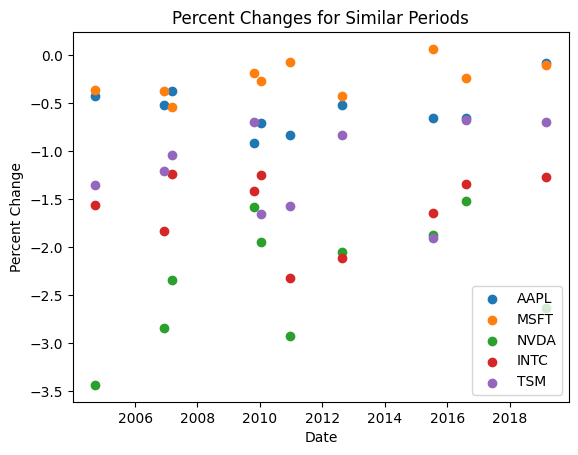

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from datetime import datetime

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Normalize the data
scaler = StandardScaler()
normalized_percent_changes = scaler.fit_transform(percent_changes)

# Step 3: Define the current period
current_period = pd.DataFrame({"AAPL": [-.62], "MSFT": [-.049], "NVDA": [-2.42], "INTC": [-1.75], "TSM": [-1.21]}) ##Take the percentage change for the date of each stock and put it in the current period in order to be compared to it for KNN
                                                                                                            #For this current period I took the percentage change of the stock at the end of 5/2/22 
# Step 4: Train the KNN model
k = 10
knn = NearestNeighbors(n_neighbors=k)
knn.fit(normalized_percent_changes)

# Step 5: Predict similar periods
normalized_current_period = scaler.transform(current_period)
distances, indices = knn.kneighbors(normalized_current_period)
similar_periods = percent_changes.iloc[indices[0]].index.tolist()

# Print the similar periods with month names
similar_periods_with_months = [datetime.strftime(period, '%B %d, %Y') for period in similar_periods]
print(f"The {k} most similar periods to the current period are: {similar_periods_with_months}")

# Plot the percent changes for the similar periods
fig, ax = plt.subplots()
for symbol in stock_symbols:
    ax.scatter(similar_periods, percent_changes.loc[similar_periods, symbol], label=symbol)
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Percent Change")
ax.set_title("Percent Changes for Similar Periods")
plt.show()


In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Define the independent and dependent variables
X = percent_changes.drop("TSM", axis=1)
y = percent_changes["TSM"]

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

'''In this code, we define the independent variable X to be the percent changes for AAPL, MSFT, NVDA, and INTC, 
and the dependent variable y to be the percent changes for TSM. We split the data into training and testing sets, normalize the 
data, and then train a linear regression model using the training data. Finally, we evaluate the model on the testing data using 
the mean squared error and the R-squared score.'''

import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the regression results
print(results.summary())


Mean Squared Error: 2.9037
R-squared: 0.3650
                                 OLS Regression Results                                
Dep. Variable:                    TSM   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              565.4
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        18:53:51   Log-Likelihood:                         -8388.9
No. Observations:                4417   AIC:                                  1.679e+04
Df Residuals:                    4413   BIC:                                  1.681e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.9

## REGRESSION Modeling 

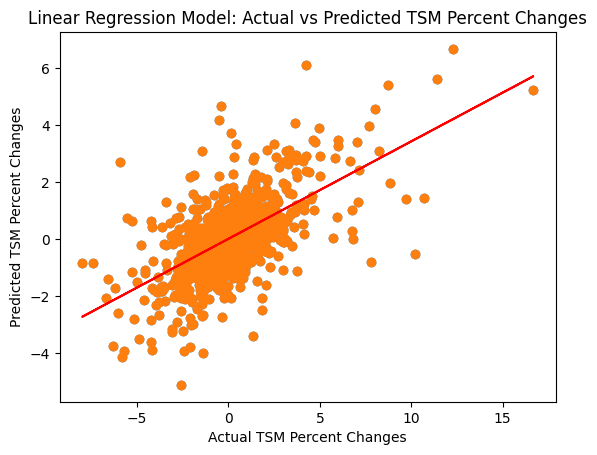

In [26]:
import matplotlib.pyplot as plt

# Create scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted TSM Percent Changes")

import numpy as np

# Add the regression line to the scatter plot
p = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, p[0]*y_test + p[1], color='red')
plt.xlabel('Actual TSM Percent Changes')
plt.ylabel('Predicted TSM Percent Changes')
plt.title('Linear Regression Model: Actual vs Predicted TSM Percent Changes')
plt.show()



In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Define the independent and dependent variables
X = percent_changes.drop("AAPL", axis=1)
y = percent_changes["AAPL"]

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

'''In this code, we define the independent variable X to be the percent changes for AAPL, MSFT, NVDA, and INTC, 
and the dependent variable y to be the percent changes for TSM. We split the data into training and testing sets, normalize the 
data, and then train a linear regression model using the training data. Finally, we evaluate the model on the testing data using 
the mean squared error and the R-squared score.'''

import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the regression results
print(results.summary())

Mean Squared Error: 3.5289
R-squared: 0.3019
                                 OLS Regression Results                                
Dep. Variable:                   AAPL   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.353
Method:                 Least Squares   F-statistic:                              603.8
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        18:53:52   Log-Likelihood:                         -8593.5
No. Observations:                4417   AIC:                                  1.720e+04
Df Residuals:                    4413   BIC:                                  1.722e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.9

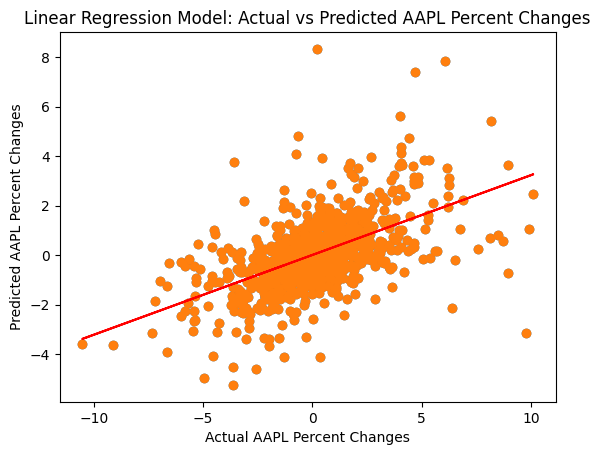

In [28]:
import matplotlib.pyplot as plt

# Create scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted TSM Percent Changes")

import numpy as np

# Add the regression line to the scatter plot
p = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, p[0]*y_test + p[1], color='red')
plt.xlabel('Actual AAPL Percent Changes')
plt.ylabel('Predicted AAPL Percent Changes')
plt.title('Linear Regression Model: Actual vs Predicted AAPL Percent Changes')
plt.show()

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Define the independent and dependent variables
X = percent_changes.drop("MSFT", axis=1)
y = percent_changes["MSFT"]

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

'''In this code, we define the independent variable X to be the percent changes for AAPL, MSFT, NVDA, and INTC, 
and the dependent variable y to be the percent changes for TSM. We split the data into training and testing sets, normalize the 
data, and then train a linear regression model using the training data. Finally, we evaluate the model on the testing data using 
the mean squared error and the R-squared score.'''

import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the regression results
print(results.summary())

Mean Squared Error: 1.5988
R-squared: 0.3944
                                 OLS Regression Results                                
Dep. Variable:                   MSFT   R-squared (uncentered):                   0.428
Model:                            OLS   Adj. R-squared (uncentered):              0.427
Method:                 Least Squares   F-statistic:                              824.9
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        18:53:52   Log-Likelihood:                         -6961.6
No. Observations:                4417   AIC:                                  1.393e+04
Df Residuals:                    4413   BIC:                                  1.396e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.9

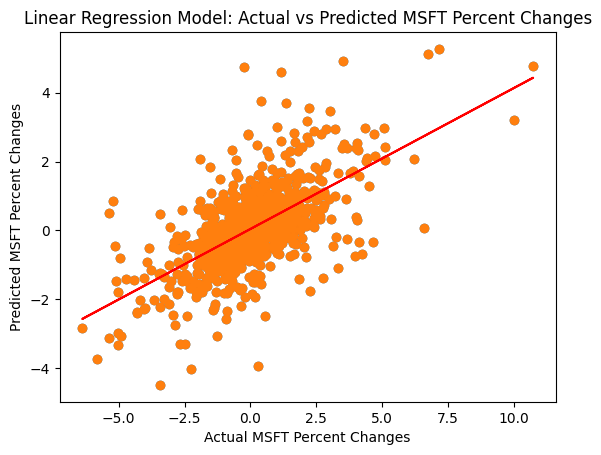

In [30]:
import matplotlib.pyplot as plt

# Create scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted TSM Percent Changes")

import numpy as np

# Add the regression line to the scatter plot
p = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, p[0]*y_test + p[1], color='red')
plt.xlabel('Actual MSFT Percent Changes')
plt.ylabel('Predicted MSFT Percent Changes')
plt.title('Linear Regression Model: Actual vs Predicted MSFT Percent Changes')
plt.show()

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Define the independent and dependent variables
X = percent_changes.drop("NVDA", axis=1)
y = percent_changes["NVDA"]

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

'''In this code, we define the independent variable X to be the percent changes for AAPL, MSFT, NVDA, and INTC, 
and the dependent variable y to be the percent changes for TSM. We split the data into training and testing sets, normalize the 
data, and then train a linear regression model using the training data. Finally, we evaluate the model on the testing data using 
the mean squared error and the R-squared score.'''

import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the regression results
print(results.summary())

Mean Squared Error: 9.0465
R-squared: 0.2926
                                 OLS Regression Results                                
Dep. Variable:                   NVDA   R-squared (uncentered):                   0.363
Model:                            OLS   Adj. R-squared (uncentered):              0.363
Method:                 Least Squares   F-statistic:                              629.1
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        18:53:52   Log-Likelihood:                         -10416.
No. Observations:                4417   AIC:                                  2.084e+04
Df Residuals:                    4413   BIC:                                  2.087e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.9

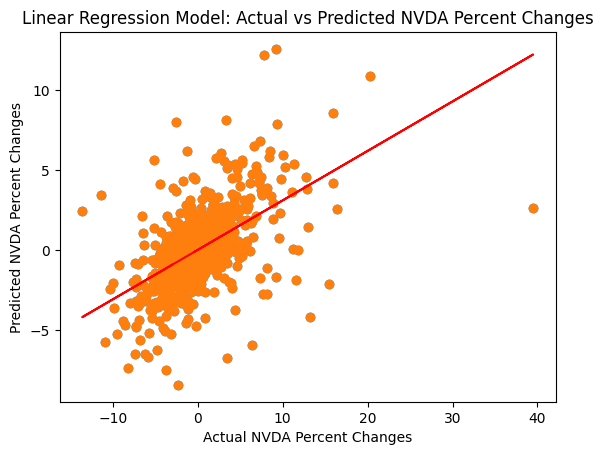

In [32]:
import matplotlib.pyplot as plt

# Create scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted TSM Percent Changes")

import numpy as np

# Add the regression line to the scatter plot
p = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, p[0]*y_test + p[1], color='red')
plt.xlabel('Actual NVDA Percent Changes')
plt.ylabel('Predicted NVDA Percent Changes')
plt.title('Linear Regression Model: Actual vs Predicted NVDA Percent Changes')
plt.show()

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Prepare the data
percent_changes = pd.DataFrame({symbol: prices_dict[symbol]["prices"]["percent_change"] for symbol in stock_symbols})
percent_changes.dropna(inplace=True)

# Rename columns to match training data
percent_changes.columns = ["AAPL", "MSFT", "NVDA", "INTC", "TSM"]

# Step 2: Define the independent and dependent variables
X = percent_changes.drop("INTC", axis=1)
y = percent_changes["INTC"]

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

'''In this code, we define the independent variable X to be the percent changes for AAPL, MSFT, NVDA, and INTC, 
and the dependent variable y to be the percent changes for TSM. We split the data into training and testing sets, normalize the 
data, and then train a linear regression model using the training data. Finally, we evaluate the model on the testing data using 
the mean squared error and the R-squared score.'''

import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Display the regression results
print(results.summary())

Mean Squared Error: 1.8823
R-squared: 0.5158
                                 OLS Regression Results                                
Dep. Variable:                   INTC   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              1146.
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        18:53:53   Log-Likelihood:                         -7534.7
No. Observations:                4417   AIC:                                  1.508e+04
Df Residuals:                    4413   BIC:                                  1.510e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.9

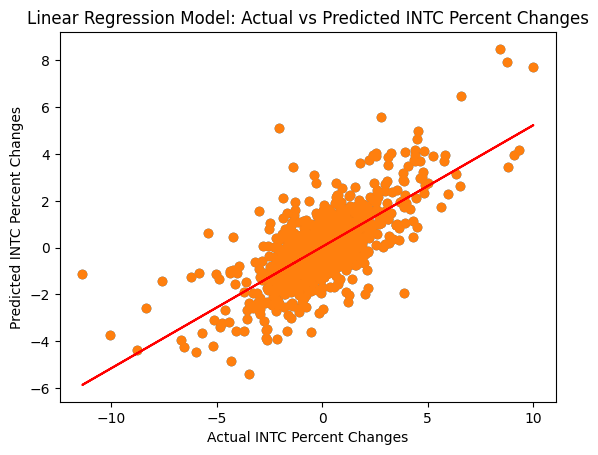

In [34]:
import matplotlib.pyplot as plt

# Create scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted TSM Percent Changes")

import numpy as np

# Add the regression line to the scatter plot
p = np.polyfit(y_test, y_pred, 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, p[0]*y_test + p[1], color='red')
plt.xlabel('Actual INTC Percent Changes')
plt.ylabel('Predicted INTC Percent Changes')
plt.title('Linear Regression Model: Actual vs Predicted INTC Percent Changes')
plt.show()